In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure.format = 'retina'

## MATPLOTLIB color name
(https://matplotlib.org/stable/gallery/color/named_colors.html)

## MATPLOTLIB linestyle
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)

In [29]:
df = pd.read_csv('oil_gold_setindex.csv',
                index_col = 'Date',
                parse_dates=True)
df

,Oil,Gold,SET
Date,,,
2003-01-31,30.71,356.859,370.01
2003-02-28,32.63,358.970,361.32
2003-03-31,27.22,340.550,364.55
2003-04-30,23.72,328.180,374.63
2003-05-31,26.71,355.683,403.82
...,...,...,...
2017-12-31,64.47,1264.450,1753.71
2018-01-31,66.28,1331.300,1826.86
2018-02-28,63.97,1330.730,1830.13


ก่อนที่จะ plot graph อะไรจะต้องทำข้อมูลในอยู่ในรูปที่เป็น index และ columns ที่ต้องการให้ได้ก่อน  
จะต้องเป็น Index column และ ตัวเลข ซึ่ง index ก็จะกลายเป็นแกน x เวลาที่ทำการ plot graph

### plot setting
1. kind
2. color สามารถที่จะกำหนดสีได้ สามาที่จะดูได้จาก website ของ matplotlib (https://matplotlib.org/stable/gallery/color/named_colors.html)    หรือว่ากำหนดเป็นความเข้าโดยใช้ทศนิยิม 0.1 - 1 แต่ต้องอยู่ในรูปของ '' `string color = '0.6'`
3. title เอากำหนดชื่อของกราฟ `title='OPEC oil price'`
4. figsize = (w,h) ผ่านค่าความกว้างและความสูง ผ่านไปใน tuples
5. linestyle
6. linewidth
7. bins คือการกำหนดจำนวนแท่งสำหรับ plot histogram
8. grid = กำหนดให้มีเส้น grid ในgraph ตั้งค่าได้โดยกำหนดให้เท่ากับ True หรือว่า False
9. alpha = เป็นการกำหนดค่าความโปร่งแสงของกราฟ
10. c เฉยๆ จะเป็นการกำหนดสีให้กับการ plot กราฟใน scatter
11. s จะเป็นการกำหนดขนาดของจุดในการ plot ในกราฟ scatter
12. ylim จะเป็นการกำหนดขนาดของแกน  y  plot ในกราฟ scatter
13. xlim จะเป็นการกำหนดขนาดของแกน  x  plot ในกราฟ scatter

## multiple plot

<Axes: xlabel='Date'>

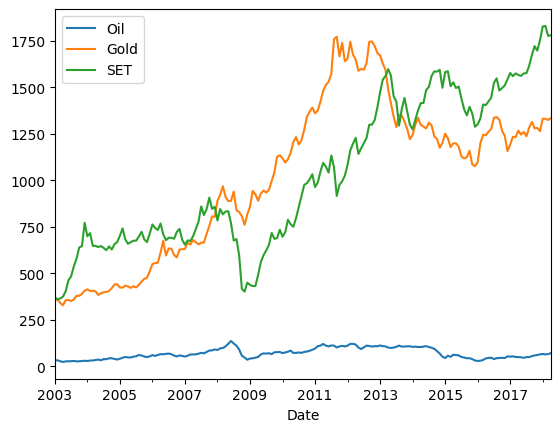

In [30]:
df.plot(kind='line') # ถ้าไม่อยากให้โขว์รายละเอียดก็ใส่ ;

<Axes: xlabel='Date'>

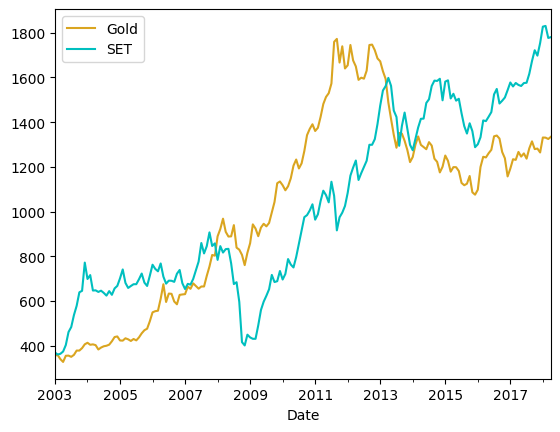

In [31]:
df[['Gold', 'SET' ]].plot(kind='line', color = ['goldenrod', 'c'])

<Axes: title={'center': 'OPEC oil price'}, xlabel='Date'>

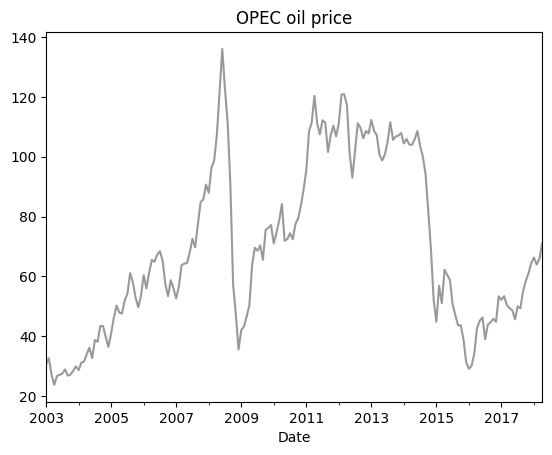

In [32]:
df['Oil'].plot(kind='line', color='.6', title='OPEC oil price')

## subplots
ทำการตั้งค่าตอน plot graph โดยกำหนดให้ `subplots = True`

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

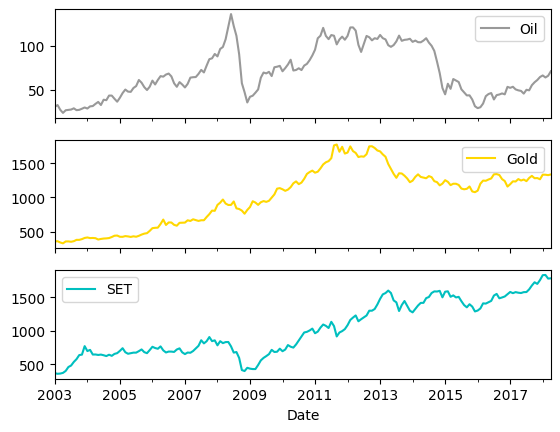

In [33]:
df.plot(kind='line',
       subplots=True,
       color = ['.6', 'gold', 'c'])

### Figsize

กำหนดขนาดของ graph ได้ด้วย figsize

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

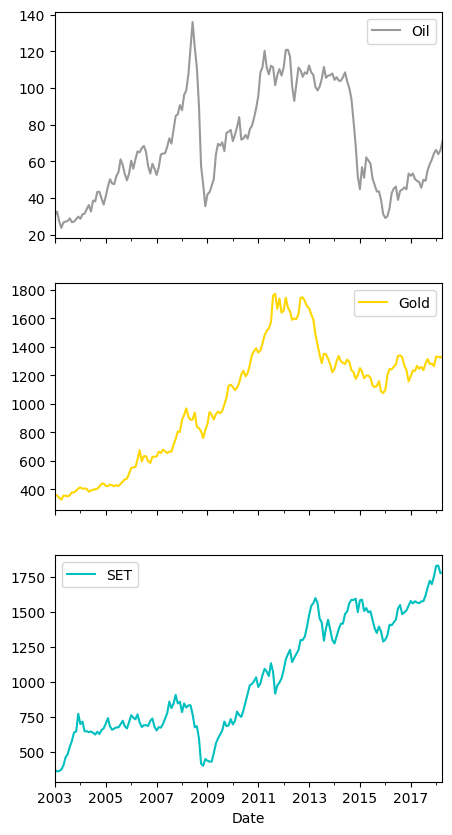

In [34]:
df.plot(kind='line',
       subplots=True,
        figsize = (5,10),
       color = ['.6', 'gold', 'c'])

### layout

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

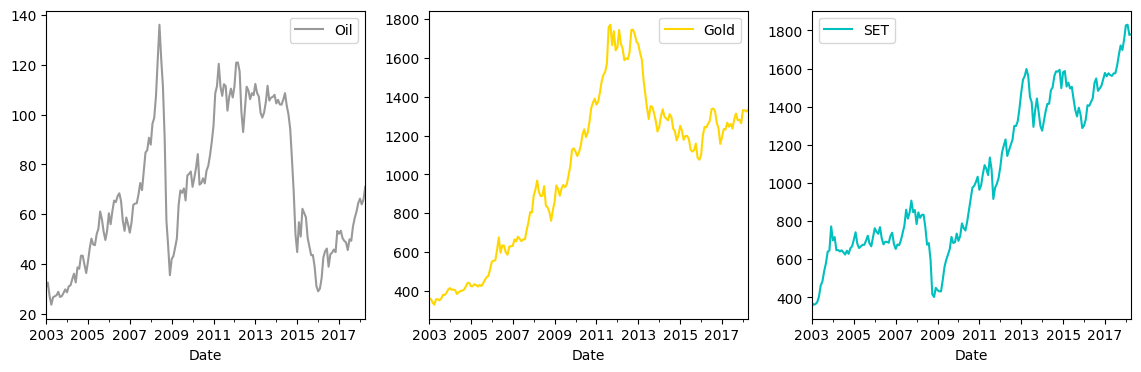

In [35]:
df.plot(kind='line',
       subplots=True,
        figsize = (14,4),
        layout = (1,3),
       color = ['.6', 'gold', 'c'])

## adv subplots

การเขียนแบบนี้จะทำให้สามารถที่กำหนดค่าของแต่ละกราฟได้ 

ทำการสร้าง subplot ที่เป็น Frame ว่างขึ้นมา 3 รูปและทำการกำหนดขนาด 

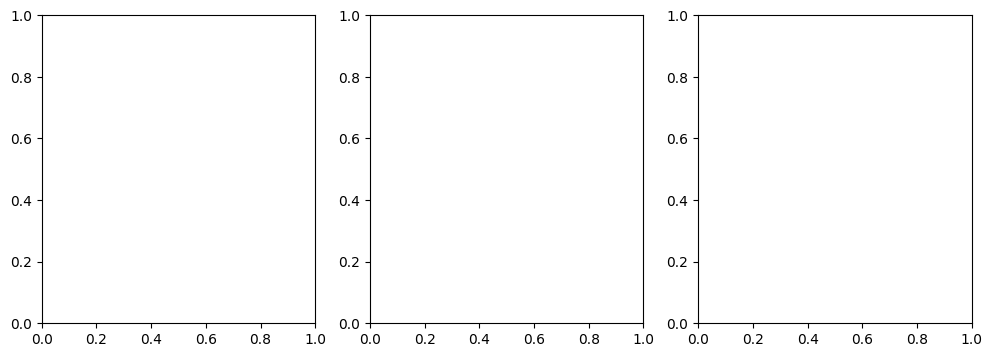

In [36]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize= (12,4))

จะเห็นว่าขนาดของแกนไม่เท่ากันเพราะว่าอันนี้ตั้งเป็น False แต่ถ้าอยากให้เท่ากันก็ตั้งให้เป็น True

เวลาที่จะ plot อะไรแบบนี้จะต้องใช้ For loop เพราะว่าจะต้องไล่ไปเป็น ตั้งแต่ axes[1, 2 ,3 ,n ]

In [37]:
print(f'length of datafram columns {len(df.columns)}\n')
for i in range(len(df.columns)):
    print(f'{i}')

length of datafram columns 3

0
1
2


length of datafram columns 3



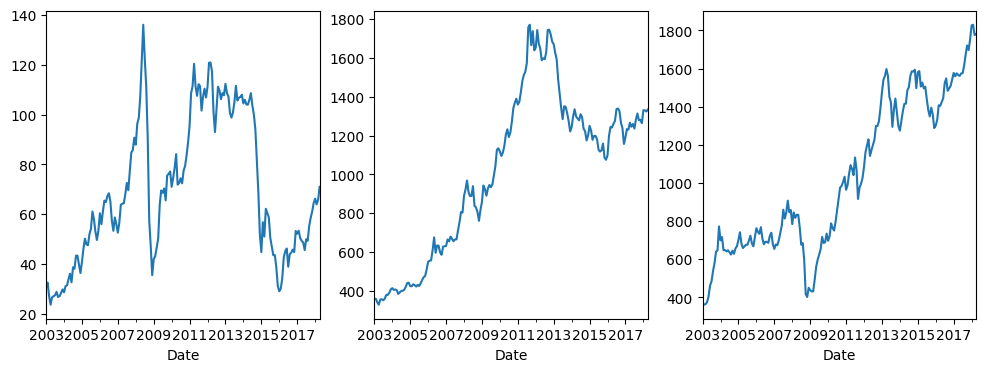

In [38]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize= (12,4))
print(f'length of datafram columns {len(df.columns)}\n')
for i in range(len(df.columns)):
    df.loc[:, df.columns[i]].plot(kind='line', ax=axes[i])

### setting color 

ต่อมาจะทำการกดกำหนดสีแยกกันในแต่ละ graph จะต้องสร้าง list ของสีที่เราต้องการเอาไว้ก่อน
กำหนดให้เป็น list 
`colors = ['gold', 'olive','orchid']`
แล้วเอาเข้าไปเรียกใช้งานใน loop ตอนที่ทำการ plot  
`color = colors[i]`

length of datafram columns 3



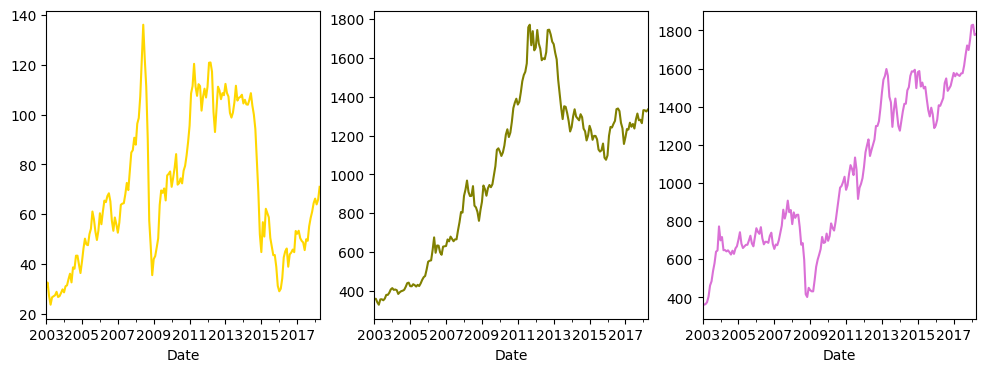

In [39]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize= (12,4))
colors = ['gold', 'olive','orchid']
print(f'length of datafram columns {len(df.columns)}\n')
for i in range(len(df.columns)):
    df.loc[:, df.columns[i]].plot(kind='line', ax=axes[i], color = colors[i])

### name Title

ทำแบบเป็น list ขึ้นมาเหมือนเดิม แล้วก็เอาไปเรียกใช้งานใน loop

length of datafram columns 3



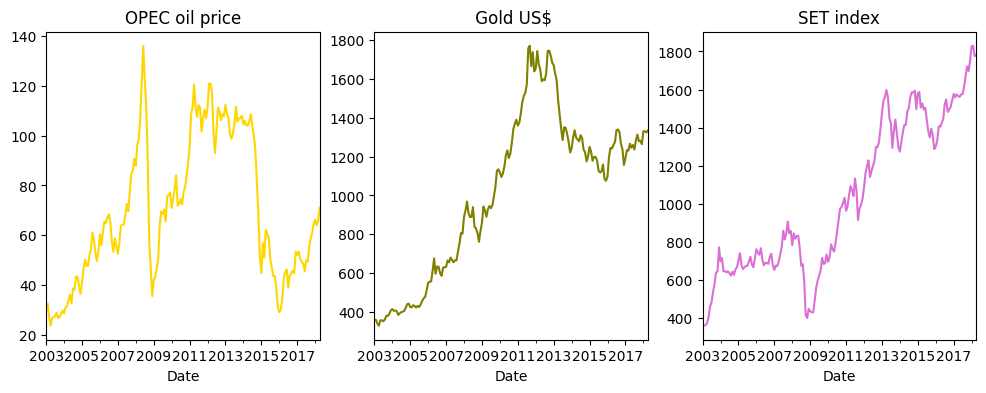

In [40]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize= (12,4))
colors = ['gold', 'olive','orchid']
titles = ['OPEC oil price', ' Gold US$', 'SET index']
print(f'length of datafram columns {len(df.columns)}\n')
for i in range(len(df.columns)):
    df.loc[:, df.columns[i]].plot(kind='line', ax=axes[i], color = colors[i], title = titles[i])

### plt tight layout
เป็นการทำให้กราฟอ่านได้ง่ายมากขึ้น ป้องกันไม่ให้ lable ของแต่ละแกนซ้อนทับกัน

length of datafram columns 3



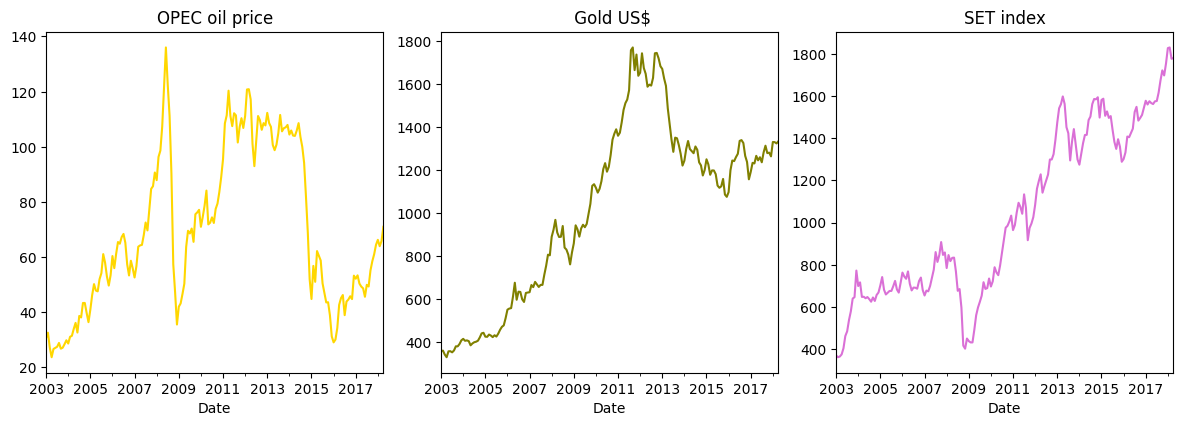

In [41]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize= (12,4))
colors = ['gold', 'olive','orchid']
titles = ['OPEC oil price', ' Gold US$', 'SET index']

plt.tight_layout()

print(f'length of datafram columns {len(df.columns)}\n')
for i in range(len(df.columns)):
    df.loc[:, df.columns[i]].plot(kind='line', ax=axes[i], color = colors[i], title = titles[i])

### Horizontal Line 
จะต้องกำหนดชื่อใหกราฟที่เราจะ plot ก่อนจะได้กำหนดแล้วขึ้นทุกกกราฟทีเดียว ตั้งชื่อว่า ax และกำหนดให้ plot ค่าเฉลียของแต่ละ กราฟ ลงไป  
`ax.axhline(df[df.columns[i]].mean())` และก็กำหนด สี และ ลักษณะเส้นลงไปตามที่เราต้องการ

length of datafram columns 3



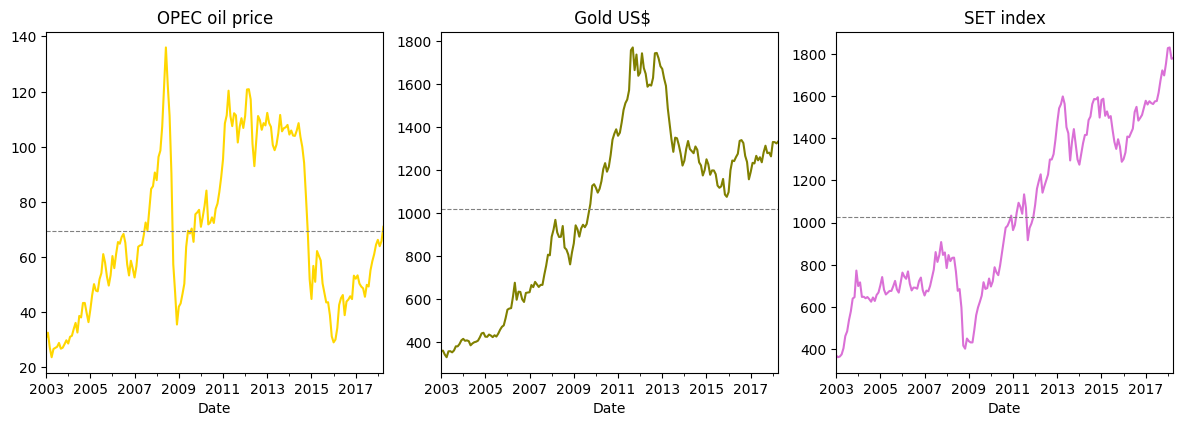

In [42]:
fig, axes = plt.subplots(1, 3, sharex = False, sharey = False, figsize= (12,4))
colors = ['gold', 'olive','orchid']
titles = ['OPEC oil price', ' Gold US$', 'SET index']

plt.tight_layout()

print(f'length of datafram columns {len(df.columns)}\n')
for i in range(len(df.columns)):
    ax = df.loc[:, df.columns[i]].plot(kind='line', ax=axes[i], color = colors[i], title = titles[i])
    ax.axhline(df[df.columns[i]].mean(), color = '0.5', linestyle = '--', linewidth = .8)

## log plot

<Axes: xlabel='Date'>

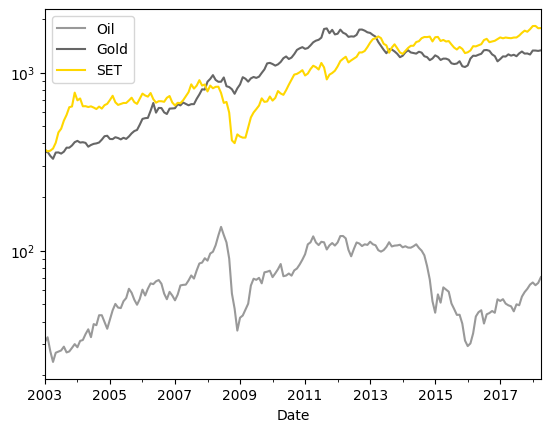

In [43]:
df.plot(kind='line', logy=True, color=['.6', '.4', 'gold'])

มาลองเปรียบเทียบกัน ซ้ายขวาแบบชัดๆ 

<Axes: xlabel='Date'>

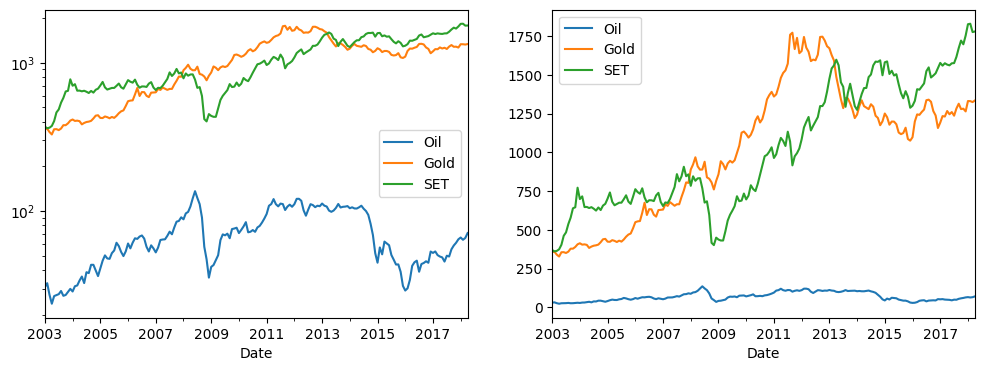

In [44]:
fig, axes = plt.subplots(1, 2, figsize = (12,4) )
df.plot(kind='line', ax = axes[0], logy = True)
df.plot(kind='line', ax = axes[1], logy = False)

## Histogram and density plot

In [45]:
df = pd.read_csv('mpg.csv')

In [46]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


จะเอาข้อมูลที่เป็นตัวเลขอย่างเดียวมา plot เป็น histogram ทันที

array([[<Axes: title={'center': 'displ'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'cyl'}>, <Axes: title={'center': 'cty'}>],
       [<Axes: title={'center': 'hwy'}>, <Axes: >]], dtype=object)

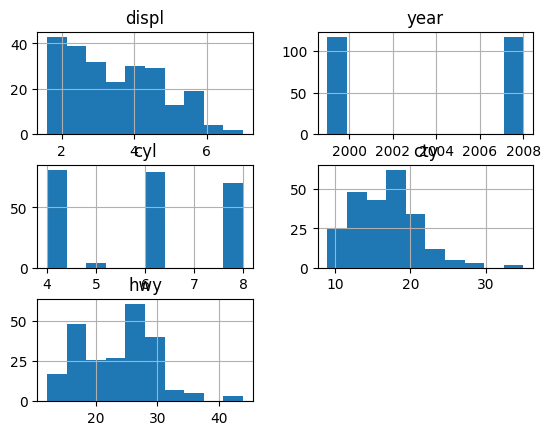

In [47]:
df.hist()

หรือจะเอาเพียง columns เดียวก็ได้

<Axes: >

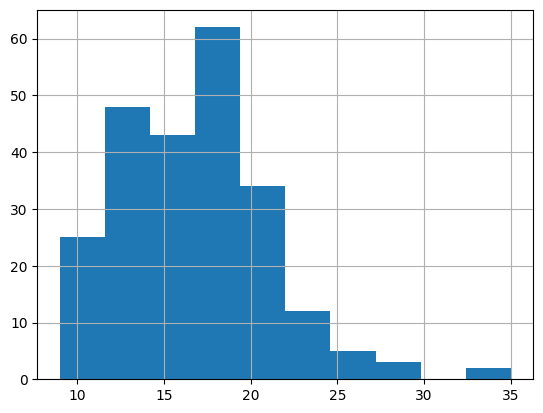

In [48]:
df.cty.hist()

### bins

<Axes: >

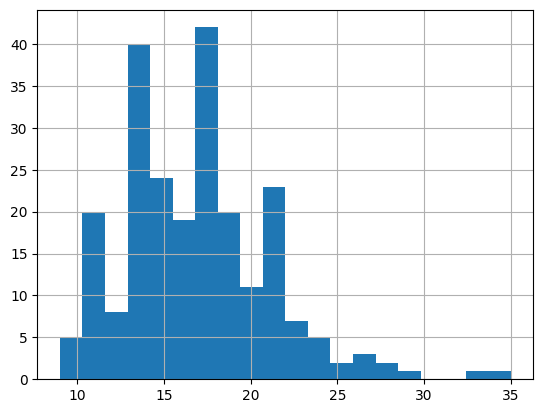

In [49]:
df.cty.hist(bins =20 )

### multiple plot 

array([[<Axes: title={'center': 'cty'}>, <Axes: title={'center': 'hwy'}>]],
      dtype=object)

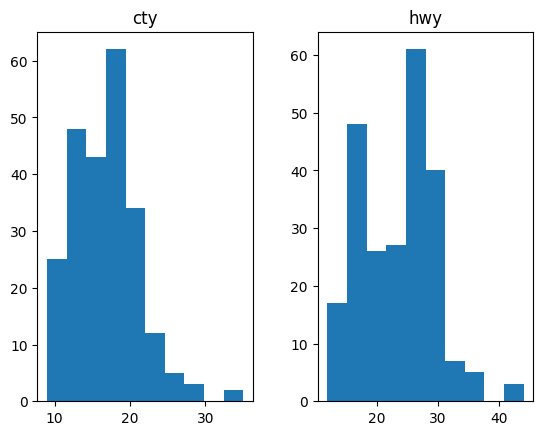

In [50]:
df[['cty', 'hwy']].hist(grid = False)

array([[<Axes: title={'center': 'cty'}>, <Axes: title={'center': 'hwy'}>]],
      dtype=object)

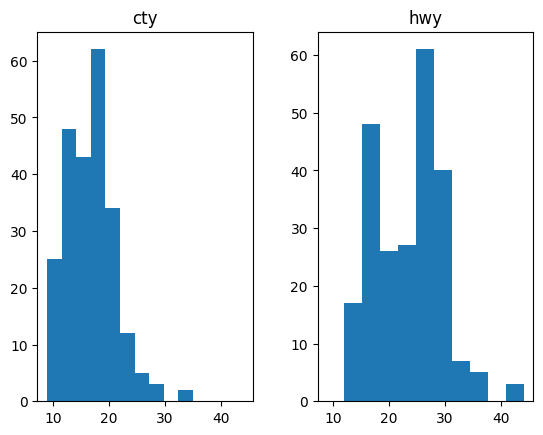

In [51]:
df[['cty', 'hwy']].hist(grid = False, sharex =True)

array([[<Axes: title={'center': 'cty'}>, <Axes: title={'center': 'hwy'}>]],
      dtype=object)

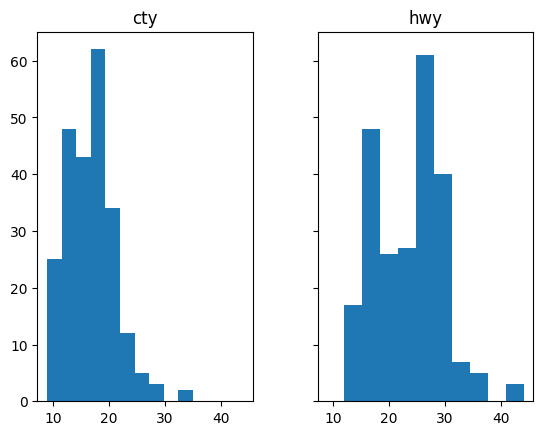

In [52]:
df[['cty', 'hwy']].hist(grid = False, sharex =True, sharey=True)

### single plot 

จะต่างกันที่ จะเป็น .plot ก่อน แล้วค่อยตาม .hist() จริงแล้วๆ เขียนได้ สองแบบ
1. .plot แล้วตามด้วย .hist()
2. .plot(kind='hist')

<Axes: ylabel='Frequency'>

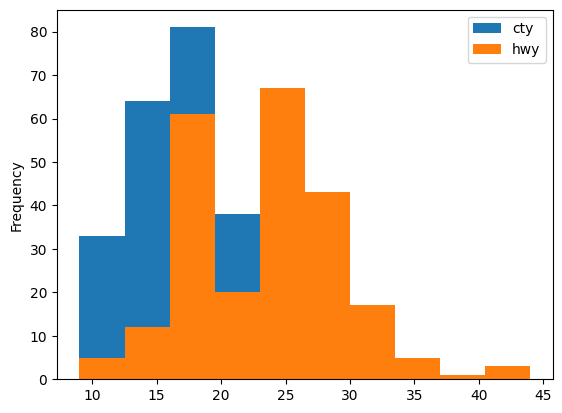

In [53]:
df[['cty', 'hwy']].plot.hist()

แบบที่ 2 

<Axes: ylabel='Frequency'>

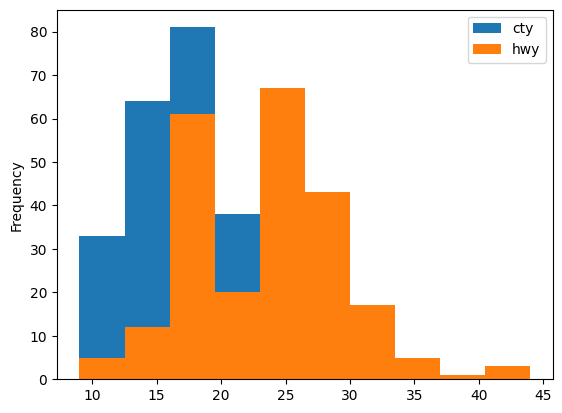

In [54]:
df[['cty', 'hwy']].plot(kind='hist')

#### alpha

เป็นการกำหนดค่าความโปร่งแสง Transparency โดยกำหนดให้เป็นทศนิยม 0.1, 0.2 , ... 1

<Axes: ylabel='Frequency'>

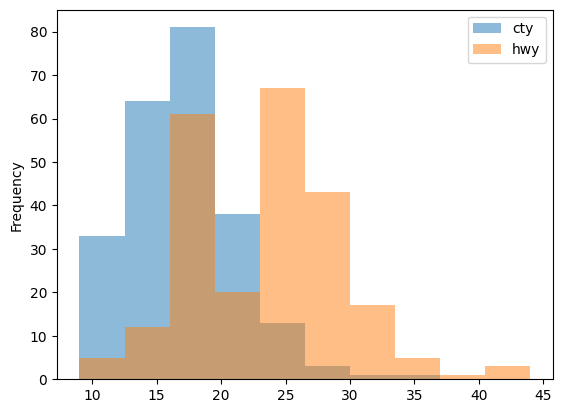

In [55]:
df[['cty', 'hwy']].plot(kind='hist', alpha = 0.5)

### Density plot

อีกชื่อนึงเรียกว่า KDE เขียนได้ 2 แบบ
1. df.columnsName.plot.kde()
2. df.columnsName.plot.density()

<Axes: ylabel='Density'>

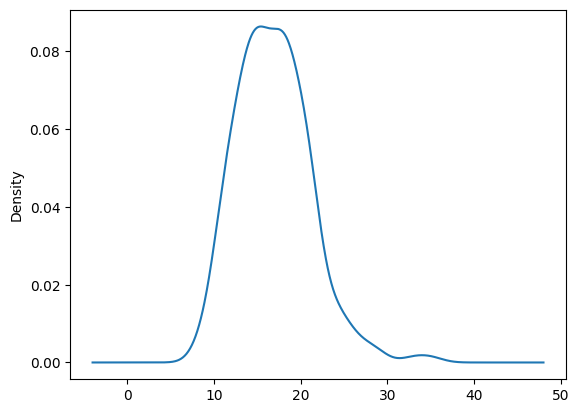

In [56]:
df.cty.plot.density()

<Axes: ylabel='Density'>

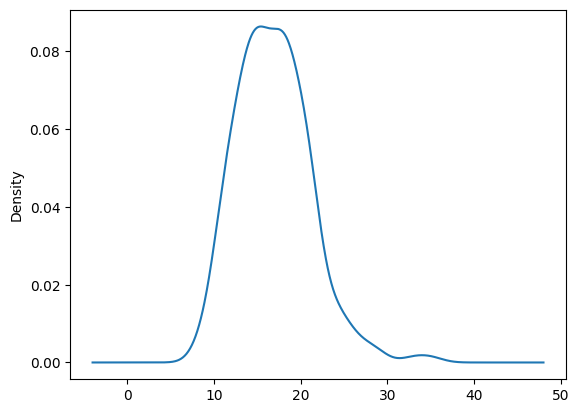

In [57]:
df.cty.plot.kde()

# Bar plot

In [58]:
df['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

## bar vertical

<Axes: xlabel='class'>

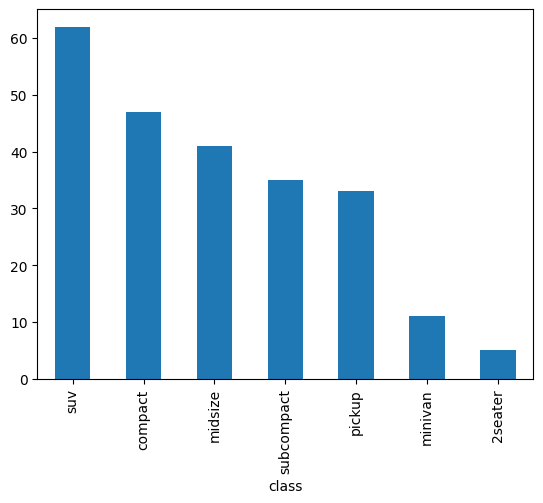

In [59]:
df['class'].value_counts().plot.bar()

## bar horizontal

<Axes: ylabel='class'>

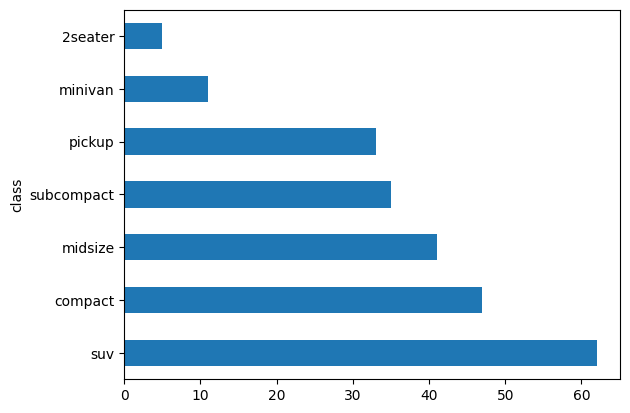

In [60]:
df['class'].value_counts().plot.barh()

# scatter plot

เป็นการดูความสัมพันธ์ระหว่างตัวแปรสองตัว ตัวอย่างนี้จะเป็นการดูความสัมพันธ์ระหว่าง ขนาดเครื่องยนต  
เทียบกับอัตรการประหยัดน้ำมัน  
เพราะฉะนั้นเราจะต้องกำหนด **ค่า x และ  y** เพื่อที่เอามาเทียบกันตอน plot

<Axes: xlabel='displ', ylabel='cty'>

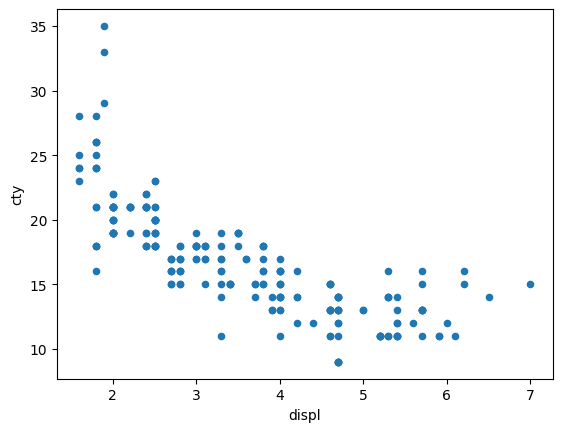

In [61]:
df.plot.scatter(x='displ', y='cty')

<Axes: title={'center': 'cty vs engine size'}, xlabel='displ', ylabel='cty'>

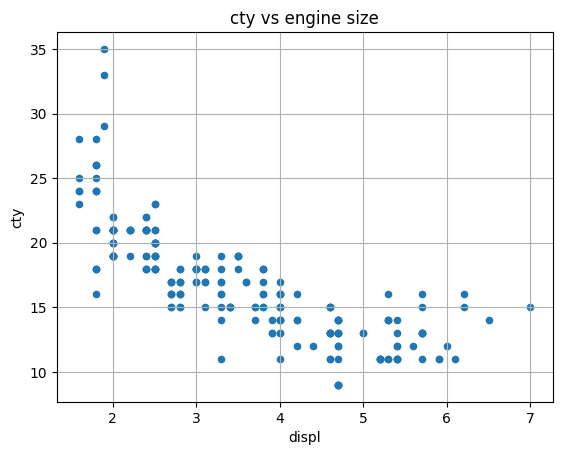

In [62]:
df.plot.scatter(x='displ', y='cty', grid=True, title = 'cty vs engine size')

<Axes: title={'center': 'cty vs engine size'}, xlabel='displ', ylabel='cty'>

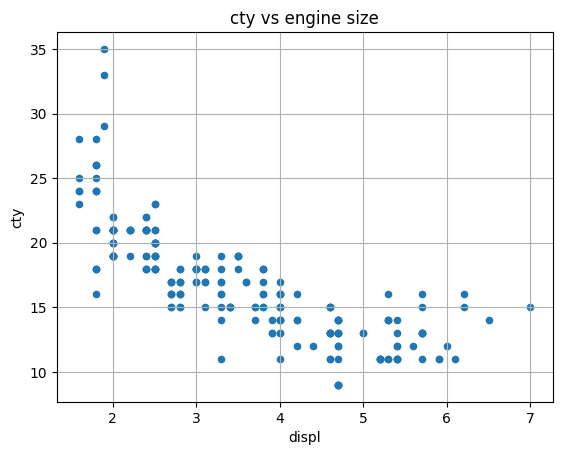

In [63]:
df.plot.scatter(x='displ', y='cty', grid=True,
                title = 'cty vs engine size')

### classified color by data

ทำได้โดยการเอาข้อมูลที่ต้องการมา map ในทีนี้จะเป็นการใช้ข้อมูลเรื่องระบบขับเคลื่อน
เช่นถ้าเป็น ขับเคลื่อนล้อหน้า (f) ก็จะเป็นสีฟ้า ขับเคลื่อน 4 ล้อ (4) ก็จะเป็นเขียว
ถ้าล้อหลังเป็น สีแดง 
 `c = df.drv.map({'4':'green', 'f':'blue', 'r':'red'})`

<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

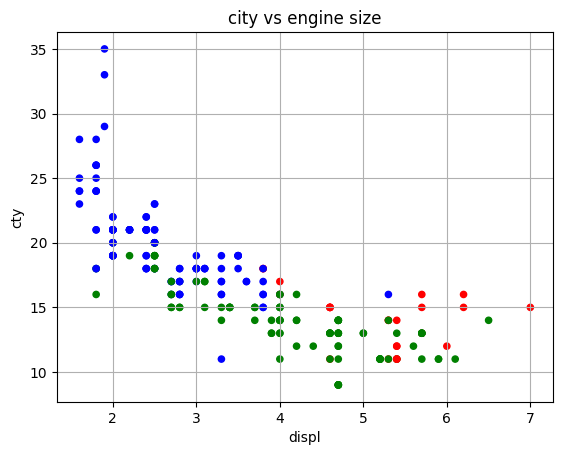

In [64]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = df.drv.map({'4':'green', 'f':'blue', 'r':'red'}),
               title = 'city vs engine size')


### classified color by size

เอาค่าขนาดมากำหนดให้ ตัวอย่างนี้จะกำหนดโดยขนาดเครื่อง displ  
`s = df.displ * 10`

<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

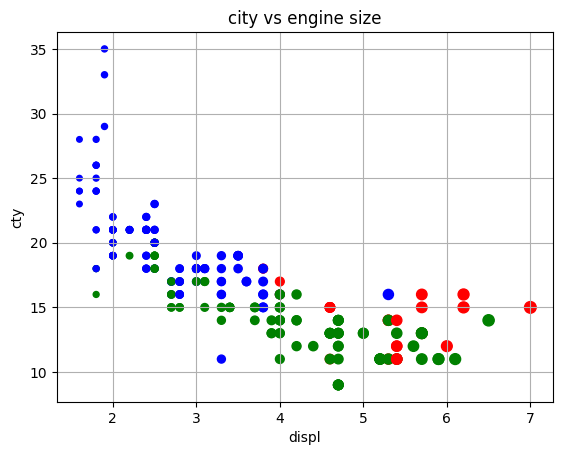

In [65]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = df.drv.map({'4':'green', 'f':'blue', 'r':'red'}),
               s = df.displ * 10,
               title = 'city vs engine size')


หรือว่าจะกำหนดขนาดเลย ก็ได้ไม่ต้องไปผุกกับค่าอะไร ก็ใส่ค่าลงไปในตรงๆ ได้เลย

## graph configuration

### color

<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

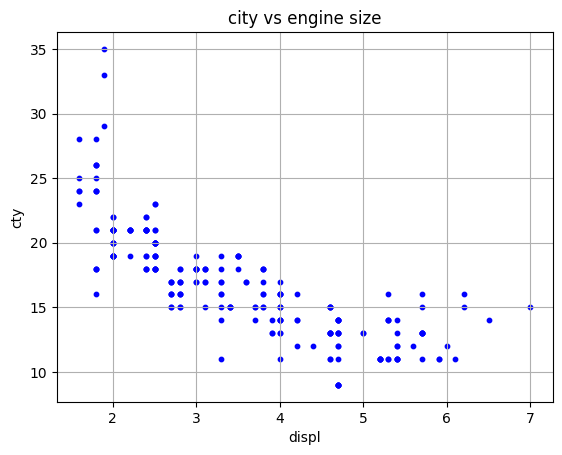

In [66]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = 'blue',
               s = 10,
               title = 'city vs engine size')


### size

กำหนดได้โดย s = ใส่ตัวเลขลงไปได้เลย ตามขนาดที่เราต้องการ

<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

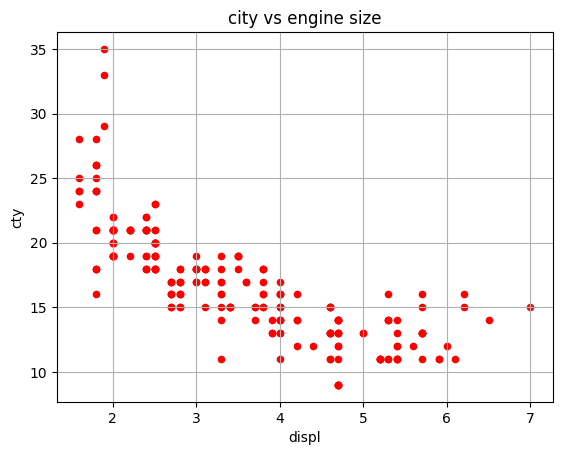

In [67]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = 'red',
               s = 20,
               title = 'city vs engine size')


### size

### y limit, xlimit

กำหนดได้โดยการใช้ ylim แล้วผ่านค่าเริ่ม้ตนกับค่าสุดท้ายเข้าไปได้ผ่าน tuple
`xlim = (start, stop)`  
`ylim = (start, stop)`

<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

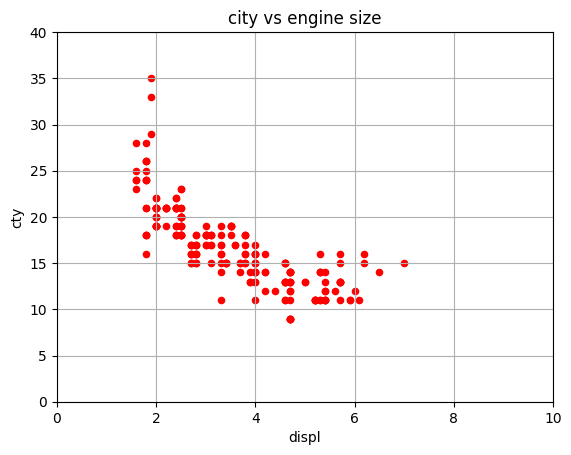

In [68]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = 'red',
               s = 20,
               ylim = (0,40),
               xlim = (0,10),
               title = 'city vs engine size')


### alpha

<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

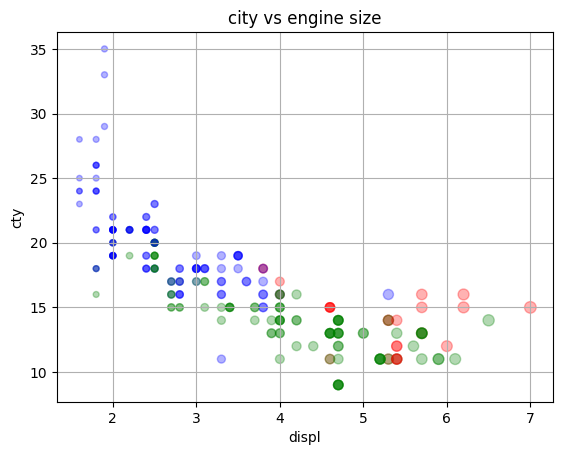

In [69]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = df.drv.map({'4':'green', 'f':'blue', 'r':'red'}),
               s = df.displ * 10,
                alpha = 0.3,
               title = 'city vs engine size')


<Axes: title={'center': 'city vs engine size'}, xlabel='displ', ylabel='cty'>

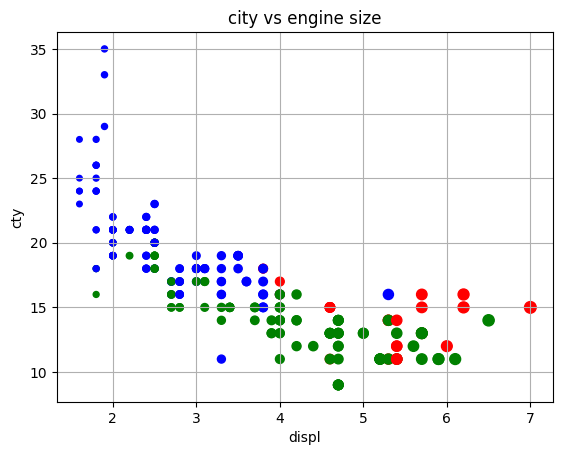

In [70]:
df.plot.scatter(x='displ', y='cty',
               grid = True,
               c = df.drv.map({'4':'green', 'f':'blue', 'r':'red'}),
               s = df.displ * 10,
               title = 'city vs engine size')


## multiplot 

### groupby 

In [77]:
group_data = df.groupby('class')[['displ','cty']]

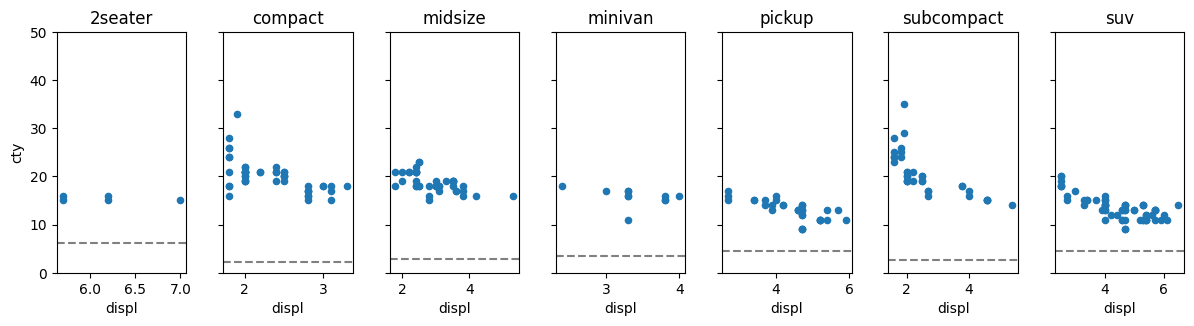

In [73]:
fig, axes = plt.subplots(1, len(group_data), figsize=(12,3), sharey=True)
plt.tight_layout()
for i, (class_name, data) in enumerate(group_data):
    ax = axes[i]
    data.plot(kind='scatter', ax=ax, x='displ', y='cty', title=class_name, ylim=(0,50))
    mean_cty = data['displ'].mean()
    ax.axhline(mean_cty, color='.5', linestyle='--')
    


### .loc 

หรือจะเขียนแบบนี้ก็ได้

In [74]:
sorted = df.set_index('class')[['cty', 'displ']]
sorted

,cty,displ
class,,
compact,18,1.8
compact,21,1.8
compact,20,2.0
compact,21,2.0
compact,16,2.8
...,...,...
midsize,19,2.0
midsize,21,2.0
midsize,16,2.8


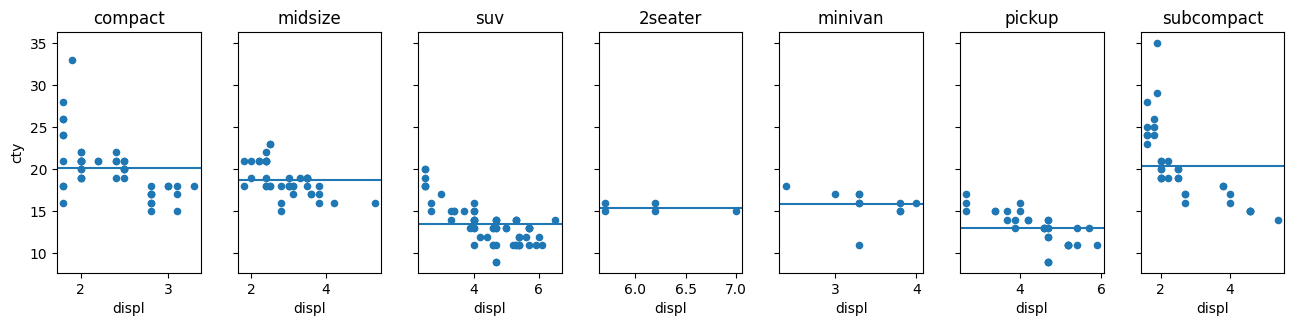

In [75]:
index = sorted.index.unique()
fig, axes = plt.subplots(1, len(index), figsize=(13,3), sharey=True)
plt.tight_layout()
for i in range(len(index)):
    ax = axes[i]
    sorted.loc[index[i],:].plot(kind='scatter', ax=ax,
                           x='displ', y='cty',
                               title = index[i])
    mean = sorted.loc[index[i],'cty'].mean()
    ax.axhline(mean)